# Extraction de connaissances à partir de données structurées et non structurées

## Séance 9 : Quelques méthodes alternatives

Nous allons voir ici l'utilisation de quelques méthodes de représentation de données et de classification, complémentaires de celles déjà vu en cours. L'avantage de `scikit-learn` est de proposer un grand nombre de méthodes de machine learning.

Pour mettre en ouevre ces méthodes, nous allons utilisé le jeu de données Iris, déjà largement vu en cours.

In [1]:
import seaborn
import pandas

iris = pandas.read_table("https://fxjollois.github.io/donnees/Iris.txt", sep = "\t")
iris_num = iris.iloc[:,:4]
iris_num.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Représentation de données

Pour la réprésentation des données, nous allons voir trois méthodes différentes dans la suite : *Isomap*, *LLE* et *MDS*. Notez que ces trois méthodes permettent de récupérer les coordonnées des points dans un sous-espace. Il est bien évidemment possible (et même recommander éventuellement) d'utiliser ces coordonnées pour réaliser une opération telle que la classification (avec $k$-means ou une *CAH*).

Toutes ces méthodes sont incluses dans le sous-module `manifold` de la librairie `sklearn`.

In [2]:
from sklearn import manifold

### Isomap

Méthode probablement la plus utilisée, elle vise à modéliser les relations géométriques non-linéaires entre les individus. Pour cela, elle utilise les distances géodésiques. Elle a pour but principal de représenter des relations spatiales ou temporelles.

In [3]:
isomap = manifold.Isomap(n_components = 2, n_neighbors = 25)
res = isomap.fit_transform(iris_num)

res_df = pandas.DataFrame(res, columns = ["X", "Y"])
res_df

,X,Y
0,-2.986495,-0.093766
1,-3.054932,-0.094380
2,-3.211404,-0.114591
3,-3.184169,-0.102344
4,-3.043833,-0.094985
...,...,...
145,2.272376,-0.096641
146,1.796300,0.353651
147,2.031000,-0.046682
148,2.212726,0.201270


On voit ci-dessous que la représentation respectent mieux les espèces, en particulier la séparation *versicolor* et *virginica* est plus visible.

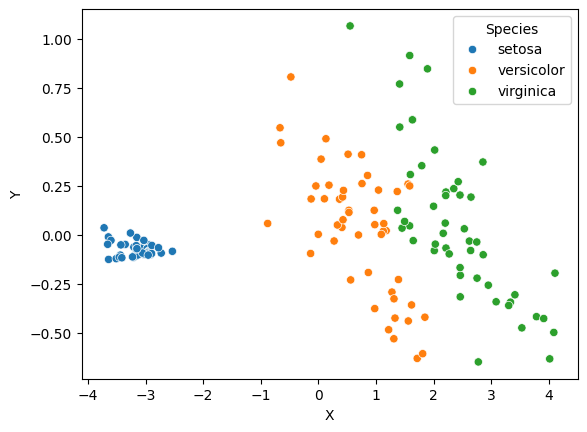

In [4]:
g = seaborn.scatterplot(res_df.assign(Species = iris["Species"]),
                        x = "X", y = "Y", hue = "Species")

### Locally Linear Embedding (*LLE*)

L'idée de cette méthode est de représenter les données en conservant les distances localement, chaque point étant représenter par une combinaison linéaire de ses voisins. Le but premier est de pouvoir apprendre les structures non-linéaires, comme pour les images et les documents textuels.

In [5]:
lle = manifold.LocallyLinearEmbedding(n_components = 2, n_neighbors = 25)
res = lle.fit_transform(iris_num)

res_df = pandas.DataFrame(res, columns = ["X", "Y"])
res_df

,X,Y
0,-0.105037,-0.033316
1,-0.104307,-0.035156
2,-0.105433,-0.053949
3,-0.104845,-0.048971
4,-0.105459,-0.040526
...,...,...
145,0.081336,-0.029264
146,0.060954,0.061371
147,0.072306,-0.009316
148,0.083073,0.024422


Ici aussi, le résultat est très intéressant pour cette séparation entre les deux espèces proches.

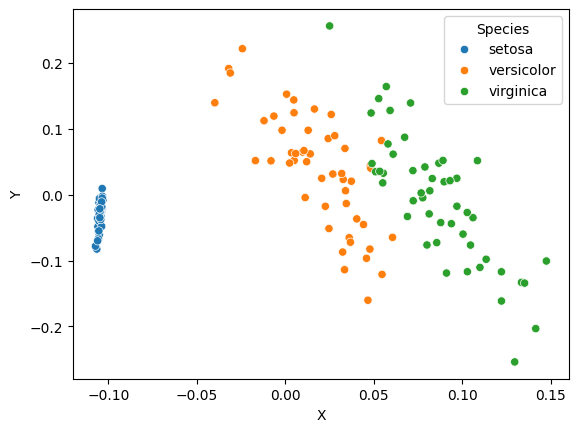

In [6]:
g = seaborn.scatterplot(res_df.assign(Species = iris["Species"]),
                        x = "X", y = "Y", hue = "Species")

## Multi-Dimensionnal Scaling (*MDS*)

Cette méthode cherche à calculer des disparités dans le sous-espace, qui sont des transformations des distances (ou dissimilarités) entre les points dans l'espace d'origine.

In [7]:
mds = manifold.MDS(n_components = 2, normalized_stress = "auto")
res = mds.fit_transform(iris_num)

res_df = pandas.DataFrame(res, columns = ["X", "Y"])
res_df

,X,Y
0,-1.534220,-2.239563
1,-1.069020,-2.515981
2,-1.221717,-2.637333
3,-0.976281,-2.597630
4,-1.581215,-2.270318
...,...,...
145,0.893697,1.812380
146,1.014434,1.187975
147,0.840210,1.574532
148,1.446167,1.531978


Bien que la séparation soit moins net que sur les deux autres méthodes, elle est plus marquée qu'avec une ACP. Par contre, la méthode ayant une initialisation aléatoire, les résultats peuvent différer d'une exécution à l'autre.

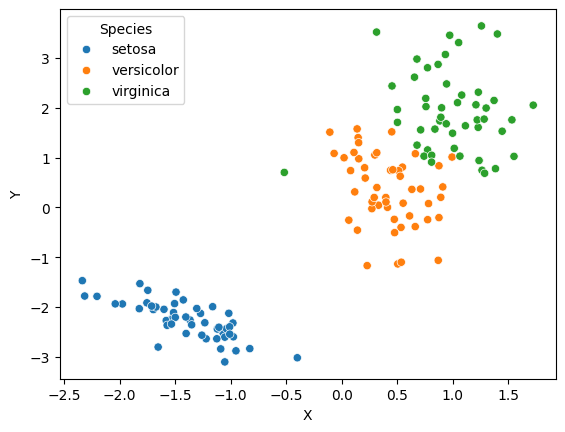

In [8]:
g = seaborn.scatterplot(res_df.assign(Species = iris["Species"]),
                        x = "X", y = "Y", hue = "Species")

## Méthodes de classification

### DBSCAN

Cet algorithme se base sur une notion de densité dans les données (définie globalement). Un individu est dit *directement accessible* à un autre individu si la distance entre les deux est plus petite qu’un seuil défini en amont. Et 2 individus sont dit *accessibles* entre eux s’il existe une chaîne de points directement accessible 2 à 2 entre les deux. Une classe est donc composée d’individus accessibles entre eux.

Un point intéressant est la capacité de la méthode à déterminer que des points sont des *outliers* et donc à ne les classer dans aucune classe.

In [9]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.75, min_samples = 10).fit(iris_num)
db

DBSCAN(eps=0.75, min_samples=10)

Le fonctionnement de cette fonction est similaire à celui de la fonction `KMeans()` déjà vue en cours. On peut ainsi récupérer la partition. Les valeurs *-1$ indiquent que l'individu est considéré comme un outlier.

In [10]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

En comparant la partition obtenue avec les espèces, on remarque que la méthode a séparé les setosa des 2 autres, mais qu'elle est incapcable de séparer *versicolor* et *virginica*. Ceci est dû à l'effet de chaîne, inhérent à la méthode. 

In [11]:
pandas.crosstab(db.labels_, iris.Species)

Species,setosa,versicolor,virginica
row_0,,,
-1,0,1,5
0,50,0,0
1,0,49,45


En réduisant la valeur de `eps` et de `min_samples` (taille minimale d'une classe), on remarque que la méthode déclare beaucoup d'individus comme outliers.

In [12]:
pandas.crosstab(DBSCAN(eps = 0.25, min_samples = 5).fit(iris_num).labels_, iris.Species)

Species,setosa,versicolor,virginica
row_0,,,
-1,17,45,50
0,33,0,0
1,0,5,0


### HDBSCAN

C'est une version hiérarchique de DBSCAN, qui l'exécute avec différentes valeurs d'`eps` et intègre le résultat pour trouver un regroupement qui donne la meilleure stabilité. Cela permet de trouver des clusters de différentes densités (contrairement à DBSCAN) et d'être plus robuste à la sélection des paramètres.

In [13]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(min_cluster_size = 10).fit(iris_num)
hdb

HDBSCAN(min_cluster_size=10)

Ici aussi, la méthode retrouve très bien les deux grandes classes mais n'arrive pas à séparer les *versicolor* des *virginica*.

In [14]:
hdb.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
pandas.crosstab(hdb.labels_, iris.Species)

Species,setosa,versicolor,virginica
row_0,,,
0,50,0,0
1,0,50,50


Un intérêt de l'implémentation de cette méthode est de récupérer une probabilité d'appartenance à sa classe pour chaque individu, ce qui permet d'avoir une idée des éventuels individus qui sont à la frintière entre deux classes.

In [16]:
hdb.probabilities_

array([1.        , 0.9486833 , 1.        , 1.        , 1.        ,
       0.65465367, 0.70710678, 1.        , 0.63960215, 0.9486833 ,
       0.83205029, 0.9486833 , 1.        , 0.48666426, 0.43759497,
       0.35112344, 0.63960215, 1.        , 0.53881591, 0.83205029,
       0.6882472 , 0.9486833 , 0.46852129, 0.6882472 , 0.57735027,
       0.72760688, 0.9486833 , 1.        , 1.        , 0.9486833 ,
       1.        , 0.77459667, 0.53881591, 0.51449576, 1.        ,
       0.83205029, 0.65465367, 0.8660254 , 0.63960215, 1.        ,
       1.        , 0.32929278, 0.63960215, 0.65465367, 0.54772256,
       1.        , 0.83205029, 1.        , 0.90453403, 1.        ,
       0.69883624, 1.        , 0.70710678, 0.8819171 , 1.        ,
       1.        , 0.83666003, 0.47776654, 0.89871703, 0.74339194,
       0.49705012, 1.        , 0.69883624, 0.97700842, 0.78590525,
       0.83666003, 0.91651514, 0.97700842, 0.62360956, 1.        ,
       0.83666003, 0.91651514, 0.89871703, 0.8660254 , 0.93541

## Travail à faire

Reprendre les données `WGI`, `Wine`, `hadCRUT5` et `Spotify` et appliquer les méthodes pour voir les différences de résultats avec les méthodes déjà vues.

- Tester différents nombres de voisins pour les méthodes de représentationes
- Tester différentes valeurs des paramètres pour la classification
- Tester l'usage de la classification sur les résultats des différentes méthodes de représentations